In [5]:
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
import textblob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report 
import seaborn as sn
!pip install text-normalizer
import text_normalizer as tn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
from nltk.corpus import stopwords
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import (accuracy_score, classification_report,confusion_matrix)
!pip install afinn
from afinn import Afinn
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn import metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
#Loading the dataset
df=pd.read_csv("IMDB Dataset.csv")
print("Size of imdb dataset : ",df.shape[0])
df.head()

Size of imdb dataset :  50000


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


## **Data Preprocessing and Text Normalization**

In [8]:
#Preprocessing of reviews
blank = []
for i,rv,lb in df.itertuples():
    if rv.isspace():
        blank.append(i)
        
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
    
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

#removing special characters
def remove_special_character(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on review column
df['review']=df['review'].apply(strip_html)
df['review']=df['review'].apply(remove_between_square_brackets)
df['review']=df['review'].apply(remove_special_character)
df['review']=df['review'].apply(remove_stopwords)
df['review']=df['review'].apply(simple_stemmer)

print(df.review)

{"wouldn't", 'which', 'against', 'should', 'your', "you'd", "don't", "mustn't", 'before', 'nor', 'were', "hasn't", "wasn't", 'it', 'is', 'what', 'on', 'over', 'their', 'too', 'themselves', 'up', "you've", 'between', 'you', 'just', 'needn', 'my', 'wasn', 'aren', 'these', 'if', 'herself', 'each', "you're", "that'll", 'most', "won't", 'then', 'and', 'because', 'but', 'into', 'about', 'when', 'any', 'no', 'o', 'only', 'weren', 'himself', 'd', 'in', 'mightn', 'didn', 'do', 'once', 'hasn', "haven't", "hadn't", 'have', 'of', 'does', 'until', 'haven', "doesn't", 'few', 'yours', 'ours', 'shouldn', 're', 'be', 'did', "mightn't", 'wouldn', 'this', 'where', 'itself', 'are', 'the', "it's", 'his', 'under', 'by', 'yourself', 'an', 'with', 'during', 'here', 'myself', "didn't", 'as', 'won', 'her', 'out', 'so', "should've", 'll', 'they', 'hadn', 'all', 'y', 'from', 'them', 'theirs', "aren't", 'than', 'other', 'not', 'both', 'being', 'can', 'been', 'now', 'she', 'own', 'such', 'ourselves', 's', 'those', 

In [9]:
reviews = np.array(df['review'])
sentiments = np.array(df['sentiment'])

# extracting data for model evaluation
review_test = reviews[35000:]
sentiment_test = sentiments[35000:]
review_ids_sample = [7626, 3533, 13010]

## **Sentiment Analysis using AFINN model**

In [10]:
model = Afinn(emoticons=True) 

In [11]:
#Predict sentiments of test data
pol_sent = [model.score(review) for review in review_test]
predict_sentiments = ['positive' if score >= 1.0 else 'negative' for score in pol_sent]

Confusion Matrix:


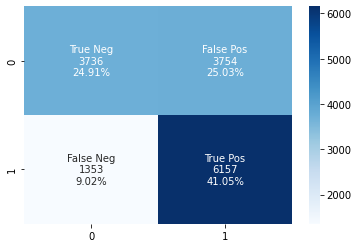

In [12]:
#Confusion matrix
print("Confusion Matrix:")
mat=confusion_matrix(sentiment_test, predict_sentiments)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in mat.flatten()/np.sum(mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')

In [13]:
#Parameters for testing the performance of our model:
print("Classification report :")
print(classification_report(sentiment_test, predict_sentiments))

Classification report :
              precision    recall  f1-score   support

    negative       0.73      0.50      0.59      7490
    positive       0.62      0.82      0.71      7510

    accuracy                           0.66     15000
   macro avg       0.68      0.66      0.65     15000
weighted avg       0.68      0.66      0.65     15000



In [14]:
#Accuracy or Testing score of our model:
print(metrics.accuracy_score(sentiment_test, predict_sentiments))

0.6595333333333333


## **Sentiment Analysis using VADER model**

In [15]:
#Building the model
def model(review,threshold=0.1,verbose=False):
    analyzer=SentimentIntensityAnalyzer()
    scores=analyzer.polarity_scores(review)

    agg_score=scores['compound']
    final_sentiment='positive' if agg_score>=threshold else 'negative'
    if verbose:
        positive = round(scores['pos'],2)*100
        final= round(agg_score,2)*100
        negative=round(scores['neg'],2)*100
        neutral =round(scores['neu'],2)*100

        print(f'POSITIVE : {positive}%')
        print(f'NEGATIVE : {negative}%')
        print(f'NEUTRAL : {neutral}%')
        print(f'FINAL : {final}')
        print(f'SENTIMENT : {final_sentiment}')
    return final_sentiment

In [16]:
#Predict sentiments of test data
predict_sentiments = [model(review, threshold=0.4, verbose=False) for review in review_test]

Confusion Matrix:


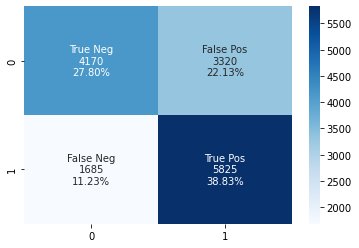

In [17]:
#Confusion matrix
print("Confusion Matrix:")
mat=confusion_matrix(sentiment_test, predict_sentiments)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in mat.flatten()/np.sum(mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')

In [18]:
#Parameters for testing the performance of our model:
print("Classification report :")
print(classification_report(sentiment_test, predict_sentiments))

Classification report :
              precision    recall  f1-score   support

    negative       0.71      0.56      0.62      7490
    positive       0.64      0.78      0.70      7510

    accuracy                           0.67     15000
   macro avg       0.67      0.67      0.66     15000
weighted avg       0.67      0.67      0.66     15000



In [19]:
#Accuracy or Testing score of our model:
print(metrics.accuracy_score(sentiment_test, predict_sentiments))

0.6663333333333333


## **Sentiment Analysis using Text Blob**

In [20]:
#Predict sentiments of test data
pol_sent = [textblob.TextBlob(review).sentiment.polarity for review in review_test]
predict_sentiments = ['positive' if score >= 0.1 else 'negative' for score in pol_sent]

Confusion Matrix:


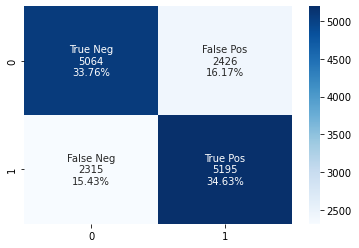

In [21]:
#Confusion matrix
print("Confusion Matrix:")
mat=confusion_matrix(sentiment_test, predict_sentiments)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in mat.flatten()/np.sum(mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')

In [22]:
#Parameters for testing the performance of our model:
print("Classification report :")
print(classification_report(sentiment_test, predict_sentiments))

Classification report :
              precision    recall  f1-score   support

    negative       0.69      0.68      0.68      7490
    positive       0.68      0.69      0.69      7510

    accuracy                           0.68     15000
   macro avg       0.68      0.68      0.68     15000
weighted avg       0.68      0.68      0.68     15000



In [23]:
#Accuracy or Testing score of our model:
print(metrics.accuracy_score(sentiment_test, predict_sentiments))

0.6839333333333333
